In [1]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=dd7206c75779018bfebc02bb1534ed4e9c34df4ca96f728c6832d44839e918d5
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [3]:
base = pd.read_csv('UCI_Credit_Card.csv', header = 0)
base.shape

(30000, 25)

In [4]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [6]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [7]:
X = base.iloc[:,[1,25]].values

In [8]:
X

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [11]:
X.shape

(30000, 2)

In [12]:
X.T.shape

(2, 30000)

In [13]:
!pip install scikit-fuzzy
import skfuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
r = skfuzzy.cmeans(data = X.T, c = 3, m = 2, error=0.005,  maxiter=1000, init=None)

In [15]:
r

(array([[ 0.97527533, -0.42057189],
        [ 0.7496416 ,  2.01617018],
        [-0.73891509, -0.30174804]]),
 array([[0.06225481, 0.12404319, 0.01586872, ..., 0.03497229, 0.0298121 ,
         0.01801331],
        [0.02592738, 0.02732921, 0.0049917 , ..., 0.0149193 , 0.01406539,
         0.00906584],
        [0.91181781, 0.8486276 , 0.97913957, ..., 0.95010841, 0.95612251,
         0.97292085]]),
 array([[0.88728142, 0.39849401, 0.32508858, ..., 0.46483633, 0.27481555,
         0.4290368 ],
        [0.05572926, 0.39169572, 0.35558957, ..., 0.03408226, 0.10753217,
         0.48209602],
        [0.05698932, 0.20981028, 0.31932185, ..., 0.50108141, 0.61765228,
         0.08886717]]),
 array([[2.12919932, 1.36352518, 1.57264009, ..., 2.03761248, 1.70022675,
         1.90744331],
        [3.29931257, 2.90493304, 2.80398685, ..., 3.11967574, 2.47529641,
         2.68871301],
        [0.55635084, 0.52130399, 0.20020644, ..., 0.39092825, 0.30022464,
         0.25954319]]),
 array([25821.232327

In [16]:
previsoes_porcentagem = r[1]

In [17]:
previsoes_porcentagem.shape

(3, 30000)

In [18]:
previsoes_porcentagem

array([[0.06225481, 0.12404319, 0.01586872, ..., 0.03497229, 0.0298121 ,
        0.01801331],
       [0.02592738, 0.02732921, 0.0049917 , ..., 0.0149193 , 0.01406539,
        0.00906584],
       [0.91181781, 0.8486276 , 0.97913957, ..., 0.95010841, 0.95612251,
        0.97292085]])

In [19]:
previsoes_porcentagem[0][0]

0.062254811768255966

In [20]:
previsoes_porcentagem[1][0]

0.0259273804985583

In [21]:
previsoes_porcentagem[2][0]

0.9118178077331858

In [22]:
previsoes_porcentagem[0][0] + previsoes_porcentagem [1][0] + previsoes_porcentagem [2][0]

1.0

In [23]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [24]:
previsoes

array([2, 2, 2, ..., 2, 2, 2])

In [25]:
previsoes[5000]

2

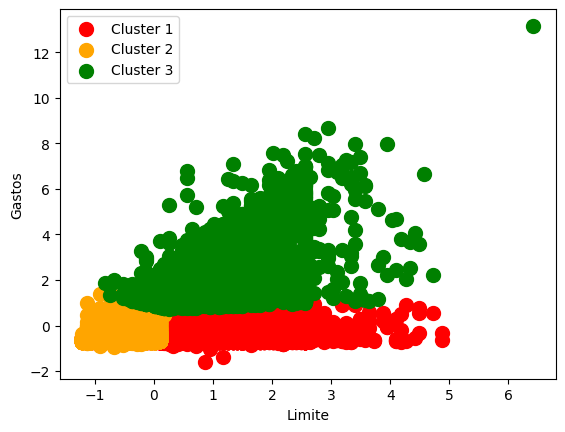

In [26]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();